In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
df = pd.read_csv("C:\\Users\\Wei Zhao\\Documents\\Python\\soccer-spi\\spi_matches.csv") 

Take a quick view of the data.

In [3]:
df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
0,2016-08-12,1843,French Ligue 1,Bastia,Paris Saint-Germain,51.16,85.68,0.0463,0.8380,0.1157,...,32.4,67.7,0.0,1.0,0.97,0.63,0.43,0.45,0.00,1.05
1,2016-08-12,1843,French Ligue 1,AS Monaco,Guingamp,68.85,56.48,0.5714,0.1669,0.2617,...,53.7,22.9,2.0,2.0,2.45,0.77,1.75,0.42,2.10,2.10
2,2016-08-13,2411,Barclays Premier League,Hull City,Leicester City,53.57,66.81,0.3459,0.3621,0.2921,...,38.1,22.2,2.0,1.0,0.85,2.77,0.17,1.25,2.10,1.05
3,2016-08-13,2411,Barclays Premier League,Crystal Palace,West Bromwich Albion,55.19,58.66,0.4214,0.2939,0.2847,...,43.6,34.6,0.0,1.0,1.11,0.68,0.84,1.60,0.00,1.05
4,2016-08-13,2411,Barclays Premier League,Everton,Tottenham Hotspur,68.02,73.25,0.3910,0.3401,0.2689,...,31.9,48.0,1.0,1.0,0.73,1.11,0.88,1.81,1.05,1.05


In [4]:
df.shape

(32274, 22)

Filter for Juventus.

In [5]:
J_df = df[df['team1']=='Juventus']

In [6]:
J_df.shape

(96, 22)

In [7]:
J_df.head()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
40,2016-08-20,1854,Italy Serie A,Juventus,Fiorentina,82.79,69.19,0.6808,0.1010,0.2182,...,79.1,60.5,2.0,1.0,1.53,0.23,1.81,0.69,2.10,1.05
127,2016-09-10,1854,Italy Serie A,Juventus,Sassuolo,83.18,59.69,0.7988,0.0400,0.1612,...,98.5,29.2,3.0,1.0,3.34,0.78,2.54,0.74,3.15,1.05
170,2016-09-14,1818,UEFA Champions League,Juventus,Sevilla FC,83.47,78.92,0.6447,0.1335,0.2217,...,NaN,NaN,0.0,0.0,1.40,0.07,2.11,0.25,0.00,0.00
250,2016-09-21,1854,Italy Serie A,Juventus,Cagliari,82.43,58.24,0.8095,0.0391,0.1514,...,NaN,NaN,4.0,0.0,3.32,0.11,1.90,0.30,3.86,0.00
403,2016-10-15,1854,Italy Serie A,Juventus,Udinese,86.66,51.86,0.8759,0.0220,0.1021,...,81.6,33.2,2.0,1.0,2.52,0.29,1.33,0.58,2.10,1.05


Filter for the fields that I'm interested in.

In [8]:
df1 = J_df[['date','league','team1','team2','spi1','spi2','score1','score2']]
df1.shape

(96, 8)

Check last few rows of the data, it shows some missing values. It's the games in the future so there's no score yet. Those data points need to be removed.

In [9]:
df1.tail()

,date,league,team1,team2,spi1,spi2,score1,score2
31129,2020-04-05,Italy Serie A,Juventus,Torino,87.05,61.08,NaN,NaN
31505,2020-04-19,Italy Serie A,Juventus,Atalanta,87.05,73.73,NaN,NaN
31736,2020-04-26,Italy Serie A,Juventus,Lazio,87.05,71.72,NaN,NaN
32030,2020-05-10,Italy Serie A,Juventus,Sampdoria,87.05,59.76,NaN,NaN
32248,2020-05-24,Italy Serie A,Juventus,AS Roma,87.05,72.76,NaN,NaN


In [10]:
df1 = df1.dropna()
df1.shape

(80, 8)

Check the format of data, sometimes the date is not in the format we want. It needs to be transformed.

In [11]:
df1.dtypes

date       object
league     object
team1      object
team2      object
spi1      float64
spi2      float64
score1    float64
score2    float64
dtype: object

In [12]:
df1['date'] = pd.to_datetime(df1['date'])

Plot the Juventus Soccor Power Index over time. The drop on May 2019 is becasue Juve lose the game with Ajax in UEFA Champion League (which is quite important), and another two draws with Torino and Atlanta.

C:\Anaconda\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


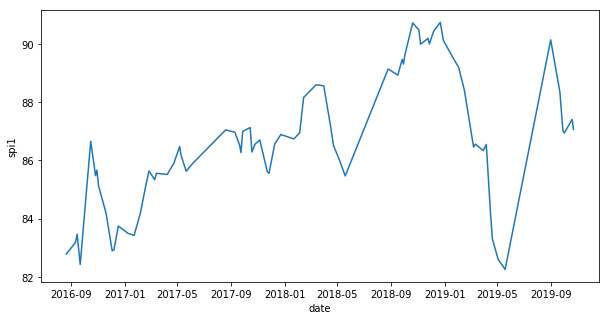

In [13]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df1, x="date", y="spi1")
plt.show()

Plot the spi score of couple top teams.

In [14]:
df2 = df[df['team1'].isin(['Juventus','Liverpool','Barcelona','Bayern Munich'])]

In [15]:
df2 = df2[['date','league','team1','team2','spi1','spi2','score1','score2']]
df2 = df2.dropna()
df2['date'] = pd.to_datetime(df2['date'])
df2 = df2[df2['date']>'2016-09-01']
df2.shape

(303, 8)

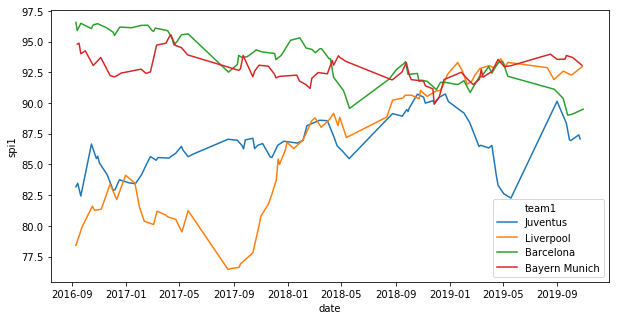

In [16]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x="date", y="spi1", hue='team1')
plt.show()

In [17]:
df_I = df[df['league']=='Italy Serie A']
df_I = df_I[df_I['date']>'2017-07-01']
df_I = df_I[['date','team1','team2','spi1','spi2','score1','score2']]

In [18]:
df_I.head()

,date,team1,team2,spi1,spi2,score1,score2
3316,2017-08-19,Juventus,Cagliari,87.05,57.81,3.0,0.0
3343,2017-08-19,Verona,Napoli,46.39,81.53,1.0,3.0
3392,2017-08-20,Atalanta,AS Roma,70.13,81.61,0.0,1.0
3409,2017-08-20,Crotone,AC Milan,53.26,73.53,0.0,3.0
3410,2017-08-20,Internazionale,Fiorentina,77.03,65.92,3.0,0.0


In [19]:
df_I.shape

(1140, 7)

In [20]:
df_I1 = df_I[['date','team1','score1','score2']]
df_I2 = df_I[['date','team2','score2','score1']]
df_I1.columns=['date','team','offense','defense']
df_I2.columns=['date','team','offense','defense']

In [21]:
frames = [df_I1,df_I2]
df_I3=pd.concat(frames)
df_I3.shape

(2280, 4)

In [22]:
df_score = df_I3.groupby(['team'],as_index=False).mean()

In [23]:
df_score

,team,offense,defense
0,AC Milan,1.411765,1.070588
1,AS Roma,1.658824,1.023529
2,Atalanta,1.905882,1.164706
3,Benevento,0.868421,2.210526
4,Bologna,1.176471,1.411765
5,Brescia,1.000000,1.555556
6,Cagliari,0.964706,1.447059
7,Chievo Verona,0.802632,1.763158
8,Crotone,1.052632,1.736842
9,Empoli,1.342105,1.842105


In [24]:
df_score[['offense', 'defense']] = preprocessing.StandardScaler().fit_transform(df_score[['offense', 'defense']])
df_score['defense'] = df_score['defense']*(-1)

In [25]:
df_score

,team,offense,defense
0,AC Milan,0.342958,1.014727
1,AS Roma,0.993114,1.143435
2,Atalanta,1.643269,0.757313
3,Benevento,-1.086894,-2.103033
4,Bologna,-0.276237,0.081601
5,Brescia,-0.740633,-0.311671
6,Cagliari,-0.833513,-0.014929
7,Chievo Verona,-1.260024,-0.879469
8,Crotone,-0.602129,-0.807494
9,Empoli,0.159644,-1.095392


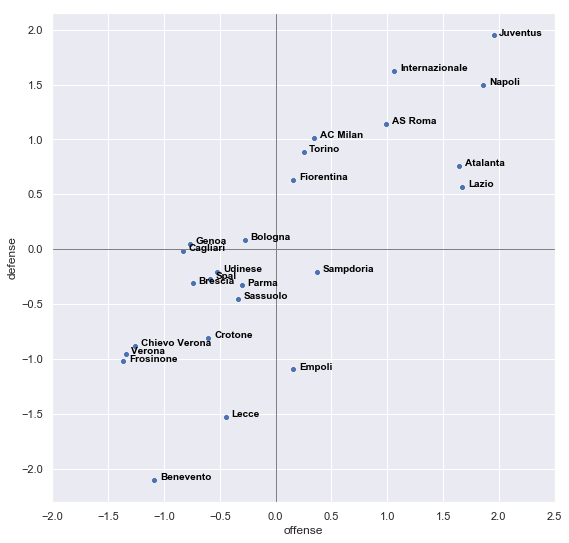

In [26]:
plt.figure(figsize=(9,9))
sns.set()
ax = sns.scatterplot(x="offense", y="defense", data=df_score)
ax.axhline(y=0, color='grey', linewidth=1)
ax.axvline(x=0, color='grey', linewidth=1)
ax.set_xlim(-2,2.5)
for line in range(0,df_score.shape[0]):
     ax.text(df_score.offense[line]+0.05, df_score.defense[line], 
             df_score.team[line], horizontalalignment='left', size='small', color='black', weight='semibold')


Code below is still in working process.

In [ ]:
df2 = df[df['date']>'2019-09-01']

In [ ]:
df2.head()

In [ ]:
df2.groupby(['team1'], sort=False)['spi1'].max()